In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:


test_df = pd.read_csv('/content/Master Test Data_Updated.csv')
train_df = pd.read_csv('/content/Master Train Sheet_Updated.csv')

print(test_df.head())
print(train_df.head())

   Index company_name        Date      close     volume   pe_ratio  \
0      1   Apple Inc.  11/21/2019  64.171341  101408000  18.452703   
1      2   Apple Inc.  11/22/2019  64.114983  101408000  18.452703   
2      3   Apple Inc.  11/25/2019  65.239166  101408000  18.452703   
3      4   Apple Inc.  11/26/2019  64.729752  101408000  18.452703   
4      5   Apple Inc.  11/27/2019  65.599197  101408000  18.452703   

   return_on_equity  return_on_assets  cash_on_hand  revenue  gross_profit  \
0             53.82             16.06        100557    64040         24313   
1             53.82             16.06        100557    64040         24313   
2             53.82             16.06        100557    64040         24313   
3             53.82             16.06        100557    64040         24313   
4             53.82             16.06        100557    64040         24313   

   operating_income  net_income  eps_earnings_per_share_diluted   pb_ratio  \
0             15625       13686 

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13408 entries, 0 to 13407
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           13408 non-null  int64  
 1   company_name                    13408 non-null  object 
 2   Date                            13408 non-null  object 
 3   close                           13408 non-null  float64
 4   volume                          13408 non-null  int64  
 5   pe_ratio                        13408 non-null  float64
 6   return_on_equity                13408 non-null  float64
 7   return_on_assets                13408 non-null  float64
 8   cash_on_hand                    13408 non-null  float64
 9   revenue                         13408 non-null  float64
 10  gross_profit                    13408 non-null  float64
 11  operating_income                13408 non-null  float64
 12  net_income                      

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           3272 non-null   int64  
 1   company_name                    3272 non-null   object 
 2   Date                            3272 non-null   object 
 3   close                           3272 non-null   float64
 4   volume                          3272 non-null   int64  
 5   pe_ratio                        3272 non-null   float64
 6   return_on_equity                3272 non-null   float64
 7   return_on_assets                3272 non-null   float64
 8   cash_on_hand                    3272 non-null   int64  
 9   revenue                         3272 non-null   int64  
 10  gross_profit                    3272 non-null   int64  
 11  operating_income                3272 non-null   int64  
 12  net_income                      32

In [ ]:
train_df.describe()

,Index,close,volume,pe_ratio,return_on_equity,return_on_assets,cash_on_hand,revenue,gross_profit,operating_income,net_income,eps_earnings_per_share_diluted,pb_ratio,total_assets,ps_ratio,close.1
count,13408.00000,13408.000000,1.340800e+04,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000,13408.000000
mean,6704.50000,29.867018,1.062955e+08,46.748088,22.934662,12.604928,43464.455729,22531.707514,10706.922480,5051.835283,3995.348827,0.312526,7.075878,116.443113,4.212770,29.867018
std,3870.70054,25.581880,1.412315e+08,307.272044,14.668328,8.365917,38686.023104,19094.126021,8080.215865,5421.134679,4458.541960,0.319257,5.519542,102.121938,2.581922,25.581880
min,1.00000,1.927279,1.512280e+07,-1548.000000,-26.025366,-17.493057,1298.459790,609.588945,118.447775,-2053.000000,-6302.000000,-0.820000,1.443878,3.233106,1.302469,1.927279
25%,3352.75000,11.465542,3.471800e+07,13.348387,13.660000,7.690000,7463.000000,7131.000000,2630.000000,347.000000,209.000000,0.060000,3.399577,19.050000,2.406593,11.465542
50%,6704.50000,22.402605,5.708320e+07,21.830645,20.060000,12.310000,32463.000000,18675.000000,10902.000000,3748.000000,2890.000000,0.230000,4.526627,91.540000,3.336735,22.402605
75%,10056.25000,41.447659,1.014080e+08,35.650000,34.940000,17.843707,68312.000000,32323.000000,16195.000000,7782.000000,6558.000000,0.510000,9.780161,180.100000,5.586207,41.447659
max,13408.00000,145.710693,1.133345e+09,1620.000000,56.730000,38.130000,142780.000000,88293.000000,33912.000000,26274.000000,20065.000000,1.700000,24.977500,406.790000,15.856771,145.710693


In [ ]:
train_df[train_df['ps_ratio'].isna()].head()

,Index,company_name,Date,close,volume,pe_ratio,return_on_equity,return_on_assets,cash_on_hand,revenue,gross_profit,operating_income,net_income,eps_earnings_per_share_diluted,pb_ratio,total_assets,ps_ratio,close.1


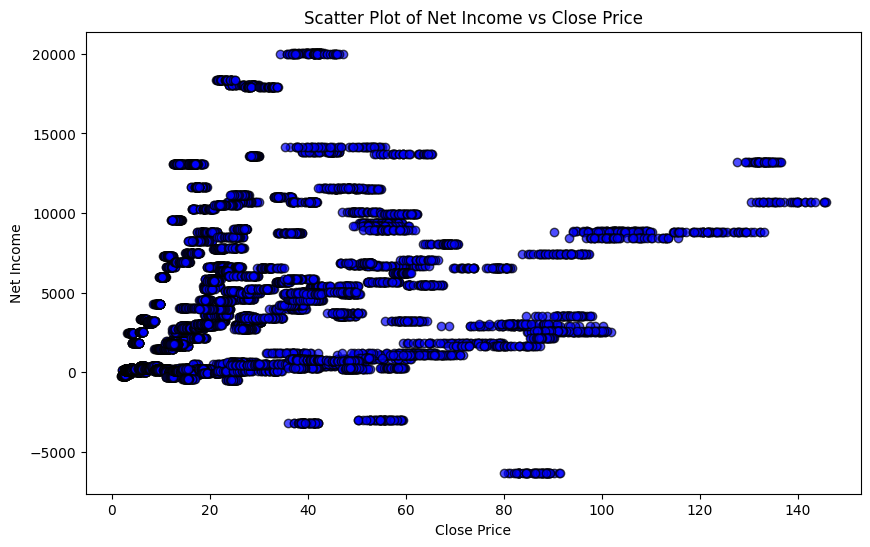

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.net_income, color='b', alpha=0.7, edgecolors='k')

plt.title("Scatter Plot of Net Income vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Net Income")

# Show plot
plt.show()

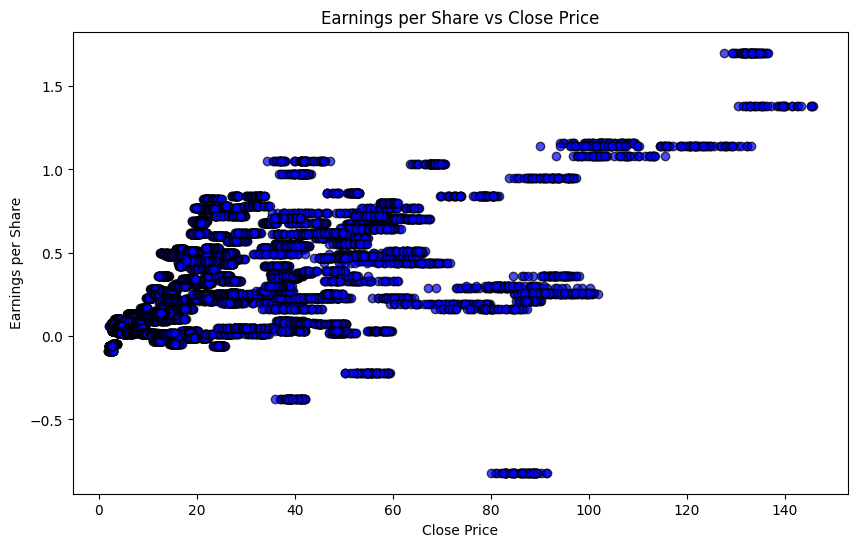

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.eps_earnings_per_share_diluted, color='b', alpha=0.7, edgecolors='k')

plt.title("Earnings per Share vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Earnings per Share")

# Show plot
plt.show()

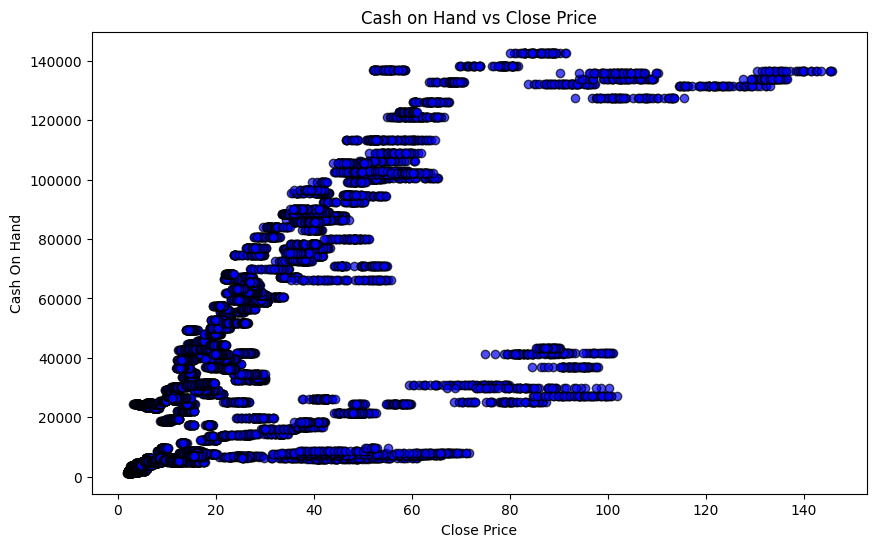

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.cash_on_hand, color='b', alpha=0.7, edgecolors='k')

plt.title("Cash on Hand vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Cash On Hand")

# Show plot
plt.show()

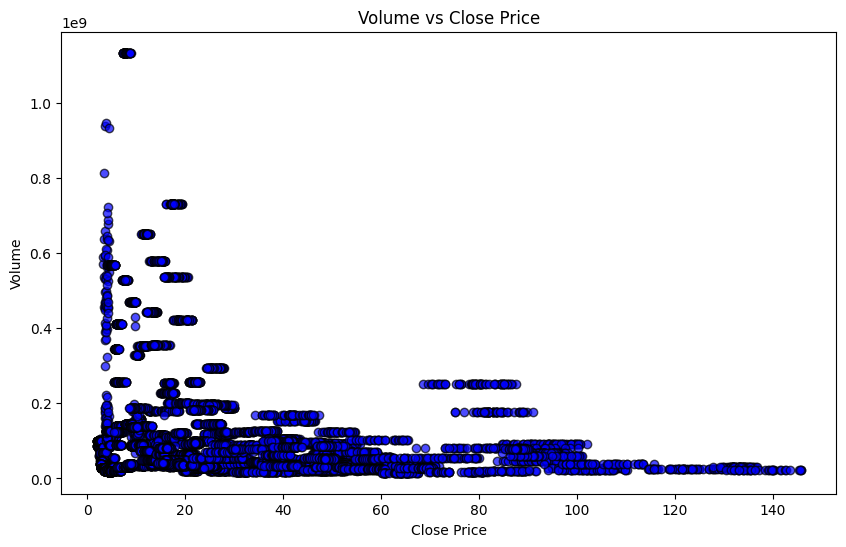

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.volume, color='b', alpha=0.7, edgecolors='k')

plt.title("Volume vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Volume")

# Show plot
plt.show()

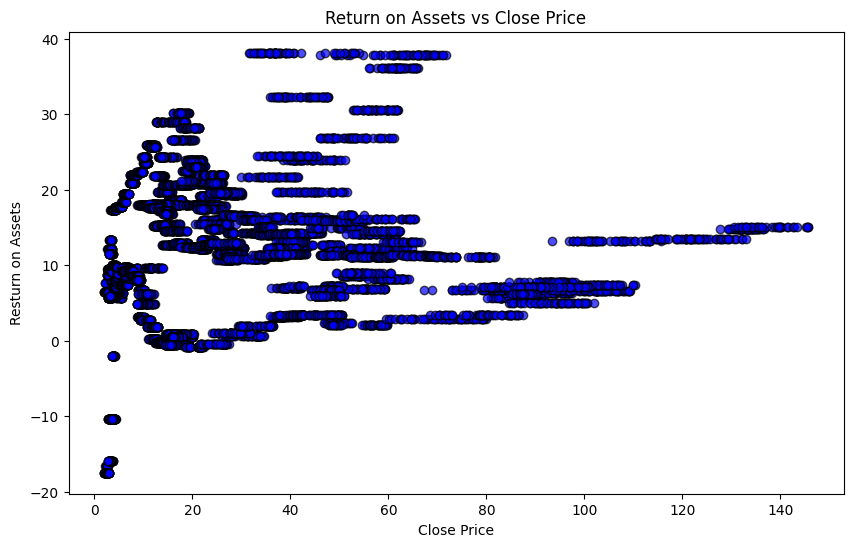

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.return_on_assets, color='b', alpha=0.7, edgecolors='k')

plt.title("Return on Assets vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Resturn on Assets")

# Show plot
plt.show()

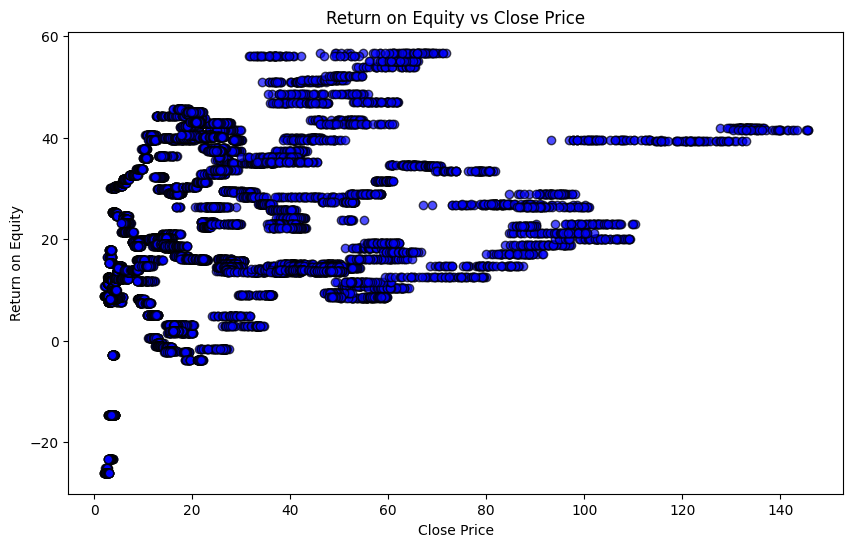

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.return_on_equity, color='b', alpha=0.7, edgecolors='k')

plt.title("Return on Equity vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Return on Equity")

# Show plot
plt.show()

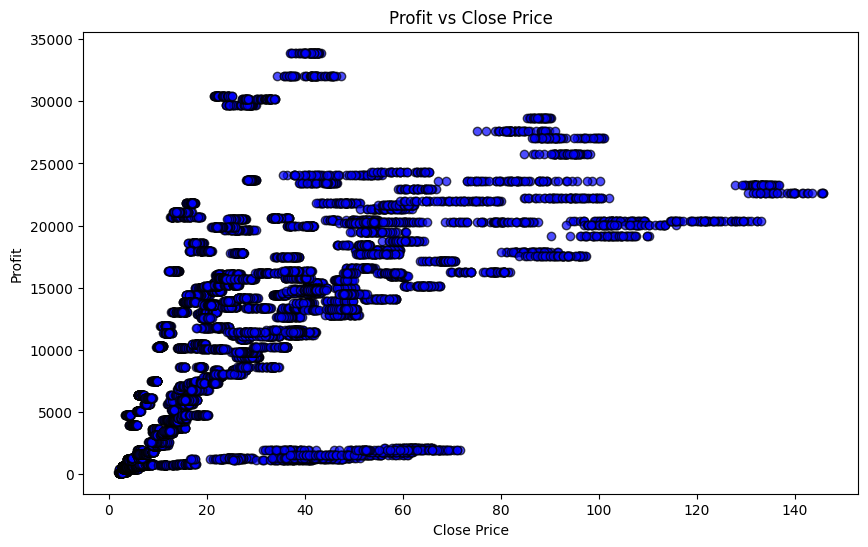

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.gross_profit, color='b', alpha=0.7, edgecolors='k')

plt.title("Profit vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Profit")

# Show plot
plt.show()

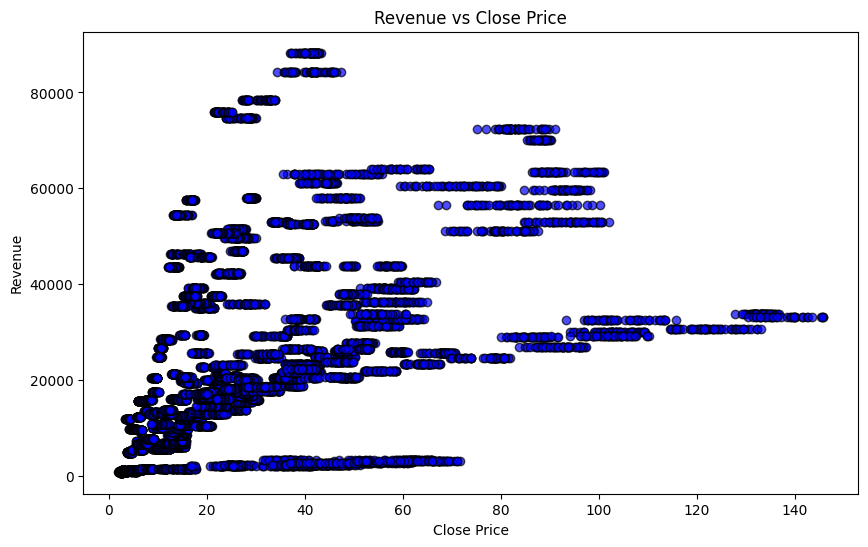

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.close, train_df.revenue, color='b', alpha=0.7, edgecolors='k')

plt.title("Revenue vs Close Price")
plt.xlabel("Close Price")
plt.ylabel("Revenue")

# Show plot
plt.show()

In [ ]:
train_df_1 = train_df.drop(columns=['Date', 'company_name','close'])
test_df_1 = test_df.drop(columns=['Date', 'company_name','close'])

In [ ]:

#model = LinearRegression()
#model.fit(train_df_1, test_df_1)
print("train_df_1 shape:", train_df_1.shape)
print("test_df_1 shape:", test_df_1.shape)

train_df_1 shape: (13408, 15)
test_df_1 shape: (3272, 15)


In [ ]:
test_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           3272 non-null   int64  
 1   volume                          3272 non-null   int64  
 2   pe_ratio                        3272 non-null   float64
 3   return_on_equity                3272 non-null   float64
 4   return_on_assets                3272 non-null   float64
 5   cash_on_hand                    3272 non-null   int64  
 6   revenue                         3272 non-null   int64  
 7   gross_profit                    3272 non-null   int64  
 8   operating_income                3272 non-null   int64  
 9   net_income                      3272 non-null   int64  
 10  eps_earnings_per_share_diluted  3272 non-null   float64
 11  pb_ratio                        3272 non-null   float64
 12  total_assets                    32

In [ ]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13408 entries, 0 to 13407
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           13408 non-null  int64  
 1   volume                          13408 non-null  int64  
 2   pe_ratio                        13408 non-null  float64
 3   return_on_equity                13408 non-null  float64
 4   return_on_assets                13408 non-null  float64
 5   cash_on_hand                    13408 non-null  float64
 6   revenue                         13408 non-null  float64
 7   gross_profit                    13408 non-null  float64
 8   operating_income                13408 non-null  float64
 9   net_income                      13408 non-null  float64
 10  eps_earnings_per_share_diluted  13408 non-null  float64
 11  pb_ratio                        13408 non-null  float64
 12  total_assets                    

In [ ]:
X = train_df_1.drop(columns=['close.1'])
y = train_df['close.1']



# Step 2: Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 55.583325070979654
R-squared: 0.9143553621609121


In [ ]:
apple_df = test_df[test_df['company_name'] == 'Apple Inc.']
nvidia_df = test_df[test_df['company_name'] == 'Nvidia']
google_df = test_df[test_df['company_name'] == 'Google']
microsoft_df = test_df[test_df['company_name'] == 'Microsoft']
amazon_df = test_df[test_df['company_name'] == 'Amazon']

In [ ]:
new_df_cols = {"date" : [], "predicted_close_price": []}
new_df = pd.DataFrame(new_df_cols)

for index, row in apple_df.iterrows():

  X = train_df_1.drop(columns=['close.1'])
  y = train_df['close.1']



  # Step 2: Split the data into training and test sets (e.g., 80% training, 20% testing)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Step 3: Initialize and train the model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Step 4: Make predictions on the test set
  y_pred = model.predict(X_test)

  apple_df.append['predicted_close_price': y_pred]

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
apple_test_df = test_df[test_df['company_name'] == 'Apple Inc.']
nvidia_test_df = test_df[test_df['company_name'] == 'Nvidia']
google_test_df = test_df[test_df['company_name'] == 'Google']
microsoft_test_df = test_df[test_df['company_name'] == 'microsoft']
amazon_test_df = test_df[test_df['company_name'] == 'amazon']

apple_test_cleaned_df = apple_test_df.drop(columns=['Date', 'company_name','close', 'close.1'])
nvidia_test_cleaned_df = nvidia_test_df.drop(columns=['Date', 'company_name','close', 'close.1'])
google_test_cleaned_df = google_test_df.drop(columns=['Date', 'company_name','close', 'close.1'])
microsoft_test_cleaned_df = microsoft_test_df.drop(columns=['Date', 'company_name','close', 'close.1'])
amazon_test_cleaned_df = amazon_test_df.drop(columns=['Date', 'company_name','close', 'close.1'])

def predict_stock_price(company_df):
    predictions = []  # Initialize the list to store predictions
    for _, row in company_df.iterrows():
        # Create a one-row DataFrame with column names preserved
        row_df = pd.DataFrame([row.values], columns=company_df.columns)
        prediction = model.predict(row_df)[0]  # Predict and extract the single prediction
        predictions.append(prediction)  # Append the prediction to the list

    return predictions  # Return the list of predictions



In [ ]:
apple_predictions = predict_stock_price(apple_test_cleaned_df)
apple_graphing_df = apple_graphing_df = apple_test_df[['Date', 'close.1']]
apple_graphing_df.rename(columns={'close.1': 'actual_close'}, inplace=True)
apple_graphing_df['predicted_close'] = apple_predictions

nvidia_predictions = predict_stock_price(nvidia_test_cleaned_df)
nvidia_graphing_df = nvidia_graphing_df = nvidia_test_df[['Date', 'close.1']]
nvidia_graphing_df.rename(columns={'close.1': 'actual_close'}, inplace=True)
nvidia_graphing_df['predicted_close'] = nvidia_predictions

google_predictions = predict_stock_price(google_test_cleaned_df)
google_graphing_df = google_graphing_df = google_test_df[['Date', 'close.1']]
google_graphing_df.rename(columns={'close.1': 'actual_close'}, inplace=True)
google_graphing_df['predicted_close'] = google_predictions

microsoft_predictions = predict_stock_price(microsoft_test_cleaned_df)
microsoft_graphing_df = microsoft_graphing_df = microsoft_test_df[['Date', 'close.1']]
microsoft_graphing_df.rename(columns={'close.1': 'actual_close'}, inplace=True)
microsoft_graphing_df['predicted_close'] = microsoft_predictions

amazon_predictions = predict_stock_price(amazon_test_cleaned_df)
amazon_graphing_df = amazon_graphing_df = amazon_test_df[['Date', 'close.1']]
amazon_graphing_df.rename(columns={'close.1': 'actual_close'}, inplace=True)
amazon_graphing_df['predicted_close'] = amazon_predictions

<ipython-input-26-b0532680147b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_graphing_df.rename(columns={'close.1': 'actual_close'}, inplace=True)
<ipython-input-26-b0532680147b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_graphing_df['predicted_close'] = apple_predictions
<ipython-input-26-b0532680147b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia

In [ ]:
apple_graphing_df.head()

nvidia_graphing_df.head()

google_graphing_df.head()

microsoft_graphing_df.head()

amazon_graphing_df.head()


,Date,actual_close,predicted_close
2617,11/21/2019,86.735497,99.317533
2618,11/22/2019,87.286003,99.315729
2619,11/25/2019,88.692001,99.313924
2620,11/26/2019,89.847000,99.312120
2621,11/27/2019,90.925499,99.310316


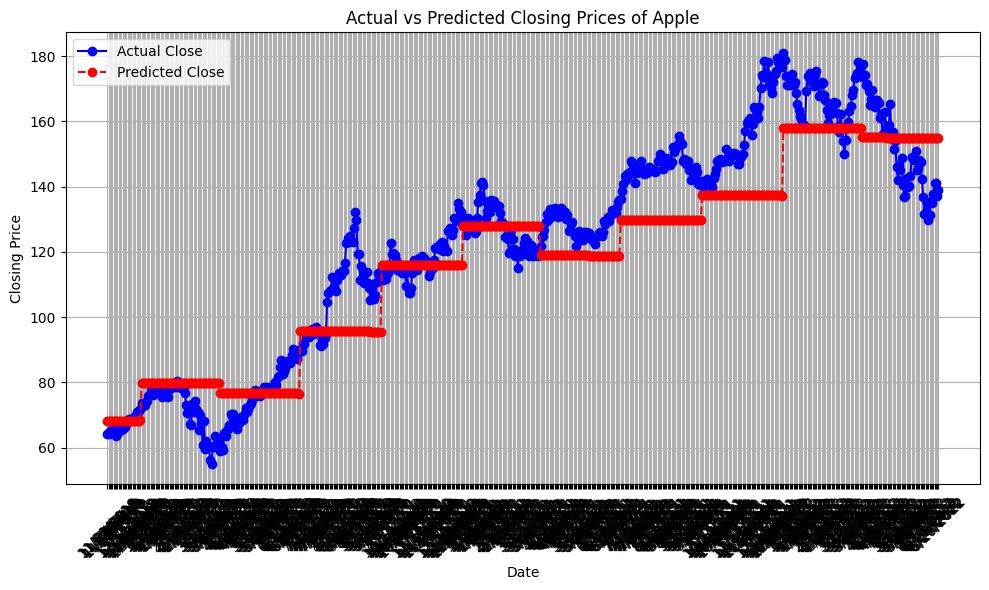

In [ ]:

# Plotting the scatter plot with lines
plt.figure(figsize=(10, 6))
plt.plot(apple_graphing_df['Date'], apple_graphing_df['actual_close'], color='blue', marker='o', linestyle='-', label='Actual Close')
plt.plot(apple_graphing_df['Date'], apple_graphing_df['predicted_close'], color='red', marker='o', linestyle='--', label='Predicted Close')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices of Apple')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

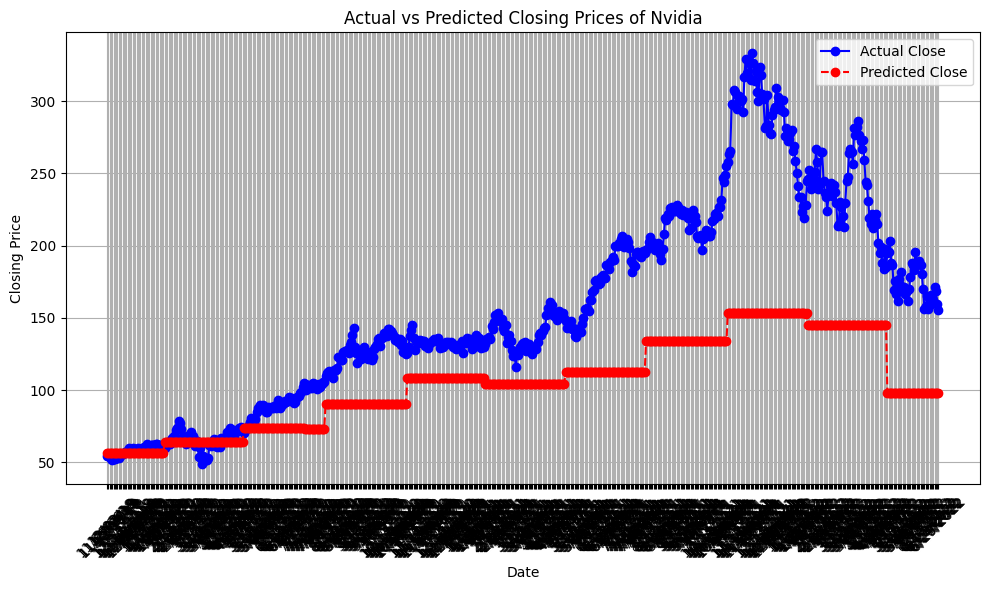

In [ ]:
# Plotting the scatter plot with lines
plt.figure(figsize=(10, 6))
plt.plot(nvidia_graphing_df['Date'], nvidia_graphing_df['actual_close'], color='blue', marker='o', linestyle='-', label='Actual Close')
plt.plot(nvidia_graphing_df['Date'], nvidia_graphing_df['predicted_close'], color='red', marker='o', linestyle='--', label='Predicted Close')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices of Nvidia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

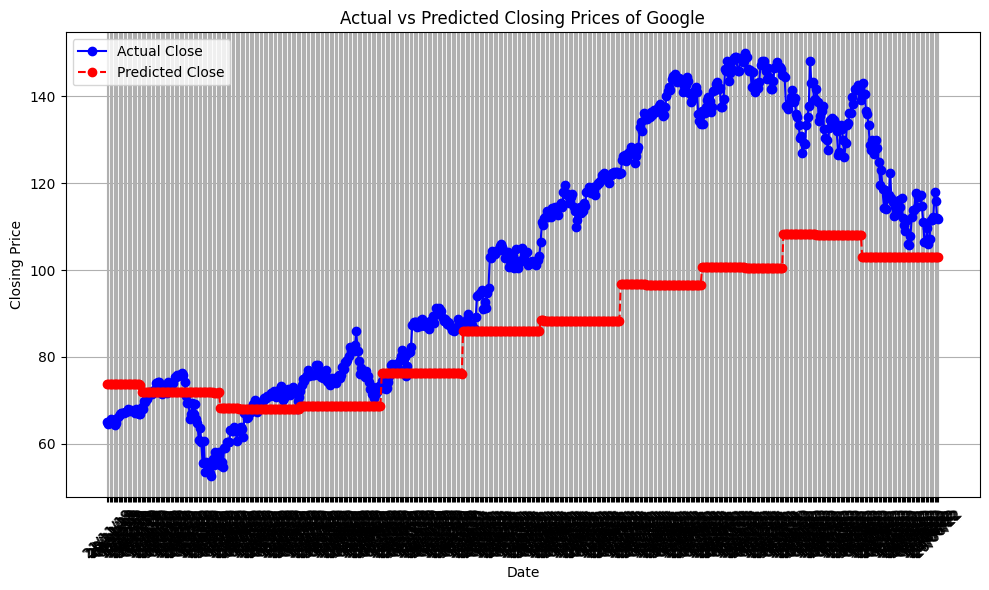

In [ ]:
# Plotting the scatter plot with lines
plt.figure(figsize=(10, 6))
plt.plot(google_graphing_df['Date'], google_graphing_df['actual_close'], color='blue', marker='o', linestyle='-', label='Actual Close')
plt.plot(google_graphing_df['Date'], google_graphing_df['predicted_close'], color='red', marker='o', linestyle='--', label='Predicted Close')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices of Google')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

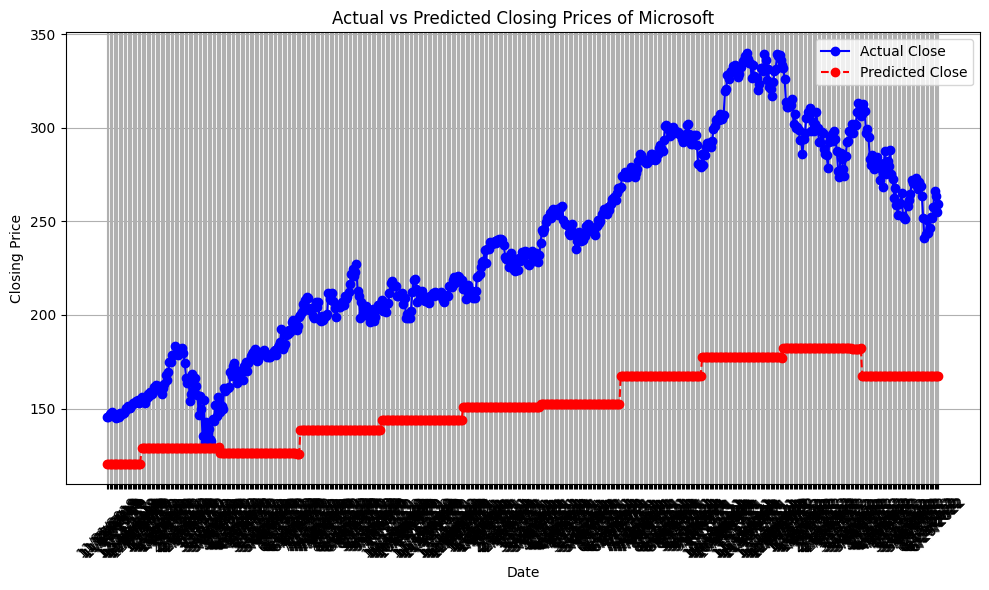

In [ ]:
# Plotting the scatter plot with lines
plt.figure(figsize=(10, 6))
plt.plot(microsoft_graphing_df['Date'], microsoft_graphing_df['actual_close'], color='blue', marker='o', linestyle='-', label='Actual Close')
plt.plot(microsoft_graphing_df['Date'], microsoft_graphing_df['predicted_close'], color='red', marker='o', linestyle='--', label='Predicted Close')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices of Microsoft')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

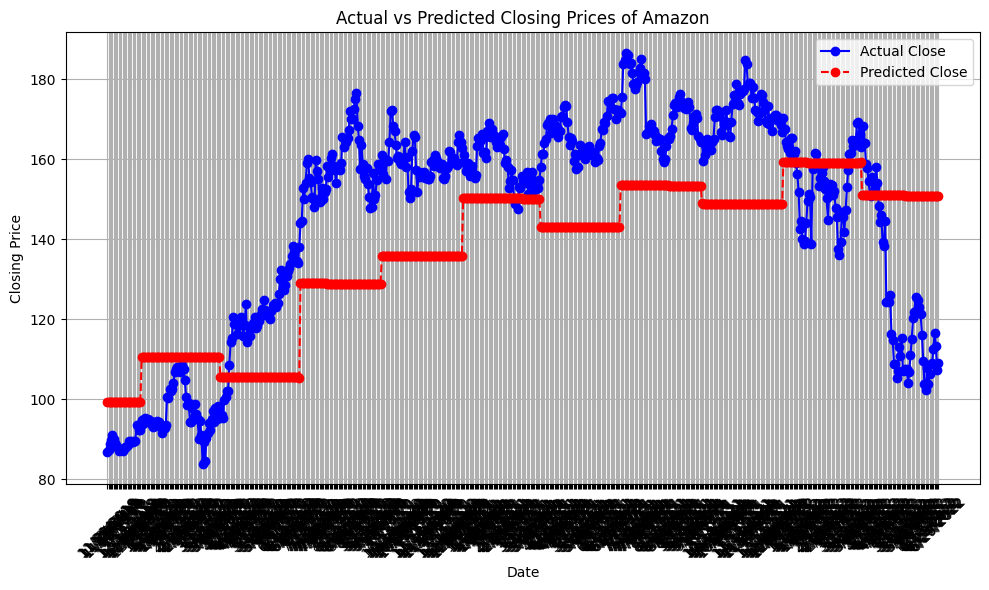

In [ ]:
# Plotting the scatter plot with lines
plt.figure(figsize=(10, 6))
plt.plot(amazon_graphing_df['Date'], amazon_graphing_df['actual_close'], color='blue', marker='o', linestyle='-', label='Actual Close')
plt.plot(amazon_graphing_df['Date'], amazon_graphing_df['predicted_close'], color='red', marker='o', linestyle='--', label='Predicted Close')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices of Amazon')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()